# Tutorial: Find bright spot from the image

In [7]:
from imutils import contours
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

### 1. Load Images

Shape is:  (560, 840)


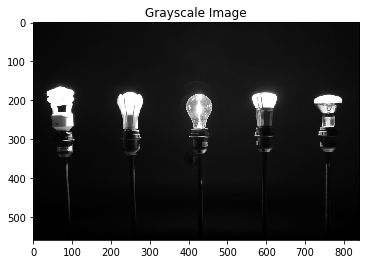

In [24]:
path = './bulb.jpeg' #original_path

image = cv2.imread(path) #load image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #change to Grayscale
blurred = cv2.GaussianBlur(gray, (11, 11), 0) #blur the image for smoothing to reduce high-frequency noise

print('Shape is: ', gray.shape)
plt.title('Grayscale Image')
plt.imshow(gray, cmap=plt.cm.gray)

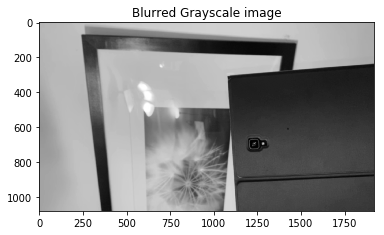

In [21]:
plt.title('Blurred Grayscale image')
plt.imshow(blurred, cmap=plt.cm.gray)

### 2. Morphology: Filtering and Processing to reduce the noise

- 영상의 밝은 부분 혹은 어두운 부분을 강조하 위해 사용하는 방법을 의미함

In [22]:
# 1. Filter the image with certain threshold
# Get the pixel higher than 200 to 255 (white)
# other pixels under 200 are set as 0 (black)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1] #originally 200

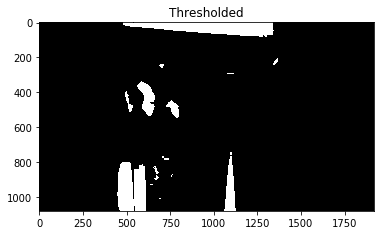

In [23]:
plt.title('Thresholded')
plt.imshow(thresh, cmap=plt.cm.gray)

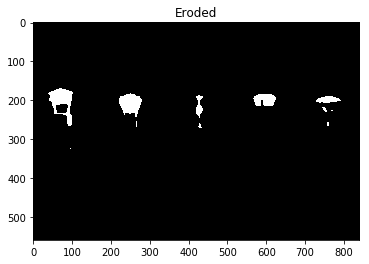

In [12]:
# 2. Eroision & Dialation to reduce the noise
# Eroision (침식): 큰 것을 작게 보기 위해 검은 픽셀 주위를 0으로 검게 해줌
# Dilation (팽창): 작은 것을 크게 보기 위해 흰 픽셀 주위 픽셀도 1으로 희게 해줌

#erosion
thresh = cv2.erode(thresh, None, iterations=2)

plt.title('Eroded')
plt.imshow(thresh, cmap=plt.cm.gray)

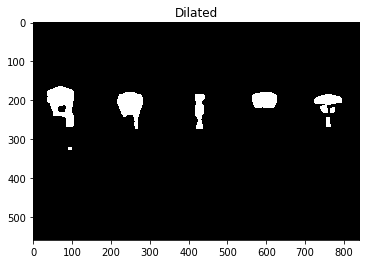

In [13]:
#dialation
thresh = cv2.dilate(thresh, None, iterations=4)

plt.title('Dilated')
plt.imshow(thresh, cmap=plt.cm.gray)

In [14]:
# 3. Connected-componenet analyis (Labeling)

In [15]:
# A. connecte-component analysis with scikit-image library
# only contain unique integer

labels = measure.label(thresh, neighbors=8, background=0)
#print(labels.shape) #(560, 840)
print('Unique componenents are: ', str(len(np.unique(labels))))

mask = np.zeros(thresh.shape, dtype='uint8')
#print(mask.shape) #(560, 840)

for label in np.unique(labels): #iterate each unique componenets
    print(label)
    
    # label == 0 --> background
    if label == 0:
        continue
        
    # otherwise, costruct the label mask and count the number of pixels
    labelMask = np.zeros(thresh.shape, dtype='uint8')
    labelMask[labels == label] = 255 #특정 component가 exist하는 영역만 흰 색으로 매핑
    
    numPixels = cv2.countNonZero(labelMask) #number of pixels
    
    # mask의 픽셀 수가 많아서 어느정도 이상의 개수가 된다면 마스크에 추가
    if numPixels > 300:
        mask = cv2.add(mask, labelMask)

Unique componenents are:  10
0
1
2
3
4
5
6
7
8
9


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  after removing the cwd from sys.path.


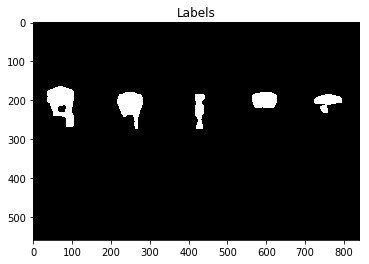

In [16]:
plt.title('Labels')
plt.imshow(mask, cmap=plt.cm.gray)

### 3. Display labels into the original image

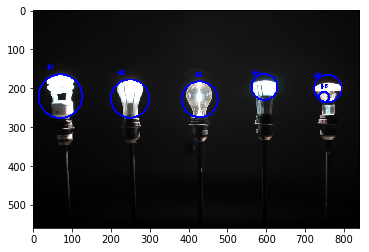

In [19]:
# A. find the contours in the mask

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
                       cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]

# B. Iterates over the contour
# idx, contours
for (idx, c) in enumerate(cnts):
    
    # draw the bright spot on the image
    (x,y,w,h) = cv2.boundingRect(c)
    
    # Calculate minimum enclosing circle
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    
    # Draw the circle
    cv2.circle(image, (int(cX), int(cY)), int(radius),
               (0, 0, 255), 3)
    
    # Draw the Text
    cv2.putText(image, "#{}".format(idx + 1), (x, y - 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    
plt.imshow(image)